<a href="https://colab.research.google.com/github/mohiddin7/Capital_Bike_Share_DATS6101/blob/main/models/classification-models/perpetrator_fixed_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dependecies**

In [ ]:
!pip install transformers datasets torch scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [1]:

import torch


# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU not available, using CPU.")



GPU is available. Using: Tesla T4


#**Read from GitHub**

In [12]:
import pandas as pd

# URL to access the raw CSV data
url = 'https://raw.githubusercontent.com/eteitelbaum/code-satp/refs/heads/main/data/perpetrator.csv'

try:
    df = pd.read_csv(url)
    print(df.head())
except Exception as e:
    print(f"Error loading CSV from URL: {e}")

  perpetrator                                   incident_summary
0    Security  An alleged arms supplier to the Communist Part...
1      Maoist  A Kamareddy dalam (squad) member belonging to ...
2    Security  Senior CPI-Maoist 'Polit Bureau' and 'central ...
3      Maoist  A TDP leader and former Sarpanch of Jerrela Gr...
4      Maoist  The CPI-Maoist cadres blasted coffee pulping u...


# **Read From Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
# Assuming your CSV file is named 'conflict_data.csv'
df = pd.read_csv('/content/drive/MyDrive/SATP_data/perpetrator.csv')


Unique values in 'perpetrator':
['Security' 'Maoist' 'Unknown']


# Fixed sets for test and val

In [13]:

# Select only the necessary columns
df = df[['incident_summary', 'perpetrator']]

# Drop rows with missing values
df.dropna(inplace=True)

# Assuming your DataFrame is named 'df'
unique_perpetrators = df['perpetrator'].unique()

# Display the unique values
print("Unique values in 'perpetrator':")
print(unique_perpetrators)

Unique values in 'perpetrator':
['Security' 'Maoist' 'Unknown']


In [14]:

from sklearn.model_selection import train_test_split

# Split data into training and temporary sets (test + validation)
train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df['perpetrator'], random_state=42)

# Split temporary set into validation and test sets
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['perpetrator'], random_state=42)

# Print the shapes of the resulting DataFrames
print("Training set shape:", train_df.shape)
print("Validation set shape:", val_df.shape)
print("Test set shape:", test_df.shape)


Training set shape: (7931, 2)
Validation set shape: (991, 2)
Test set shape: (992, 2)


In [15]:

# Calculate label-wise counts for each set
train_counts = train_df['perpetrator'].value_counts()
val_counts = val_df['perpetrator'].value_counts()
test_counts = test_df['perpetrator'].value_counts()

# Print the label-wise counts for each set
print("Label-wise counts for training set:")
print(train_counts)

print("\nLabel-wise counts for validation set:")
print(val_counts)

print("\nLabel-wise counts for test set:")
test_counts


Label-wise counts for training set:
perpetrator
Maoist      4152
Security    3410
Unknown      369
Name: count, dtype: int64

Label-wise counts for validation set:
perpetrator
Maoist      519
Security    426
Unknown      46
Name: count, dtype: int64

Label-wise counts for test set:


,count
perpetrator,
Maoist,519
Security,427
Unknown,46


# old

In [ ]:
# import pandas as pd
# import torch
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report
# from transformers import (
#     AutoTokenizer,
#     AutoModelForSequenceClassification,
#     Trainer,
#     TrainingArguments
# )
# from torch.utils.data import Dataset

# # -------------------------------------------------------
# # 1. Dataset for Single-Label Multi-Class Classification
# # -------------------------------------------------------
# class SingleLabelDataset(Dataset):
#     def __init__(self, texts, labels, tokenizer, max_length=128):
#         """
#         Args:
#             texts: List of text strings.
#             labels: List of integer class labels (e.g., [0, 1, 2, ...]).
#             tokenizer: A Hugging Face AutoTokenizer.
#             max_length: Max sequence length for tokenization.
#         """
#         self.texts = texts
#         self.labels = labels
#         self.tokenizer = tokenizer
#         self.max_length = max_length

#     def __len__(self):
#         return len(self.texts)

#     def __getitem__(self, idx):
#         text = self.texts[idx]
#         label = self.labels[idx]

#         encoding = self.tokenizer(
#             text,
#             max_length=self.max_length,
#             padding="max_length",
#             truncation=True,
#             return_tensors="pt"
#         )

#         # Squeeze batch dimension
#         item = {k: v.squeeze() for k, v in encoding.items()}
#         # Integer labels for cross-entropy
#         item["labels"] = torch.tensor(label, dtype=torch.long)

#         return item

# # -------------------------------------------------------
# # 2. Custom Metric Function
# # -------------------------------------------------------
# def compute_metricss(eval_pred, label_names=None):
#     """
#     Computes accuracy and micro/macro precision/recall/F1 for multi-class classification.
#     """
#     logits, labels = eval_pred
#     preds = torch.argmax(torch.tensor(logits), dim=1).numpy()

#     # Accuracy
#     acc = accuracy_score(labels, preds)

#     # Classification Report (optionally naming classes)
#     report = classification_report(
#         labels,
#         preds,
#         target_names=label_names if label_names else None,
#         zero_division=0,
#         output_dict=True
#     )

#     if label_names:
#         print("\nFull Classification Report:\n",
#               classification_report(labels, preds, target_names=label_names, zero_division=0))
#     else:
#         print("\nFull Classification Report:\n",
#               classification_report(labels, preds, zero_division=0))
#     return {
#         "accuracy": acc,
#         "precision_macro": report["macro avg"]["precision"],
#         "recall_macro": report["macro avg"]["recall"],
#         "f1_macro": report["macro avg"]["f1-score"],
#         "precision_weighted": report["weighted avg"]["precision"],
#         "recall_weighted": report["weighted avg"]["recall"],
#         "f1_weighted": report["weighted avg"]["f1-score"],
#     }

# # -------------------------------------------------------
# # 3. Main Training Function with Train/Val/Test Splits
# # -------------------------------------------------------
# def train_multiclass_model_3way_split(
#     df,
#     text_col="incident_summary",
#     label_col="perpetrator",
#     model_name="bert-base-uncased",
#     test_size=0.1,
#     val_size=0.1,
#     epochs=2,
#     batch_size=8
# ):
#     """
#     Trains a multi-class classifier with separate train, val, and test sets.

#     Args:
#         data_path (str): CSV file path. Must contain `text_col` and `label_col`.
#         text_col (str): Name of the column containing the text.
#         label_col (str): Name of the column containing the class label (string form).
#         model_name (str): HF model identifier, e.g. 'bert-base-uncased', 'roberta-base', etc.
#         test_size (float): Fraction of entire dataset to hold out for final test set.
#         val_size (float): Fraction of entire dataset to hold out for validation set
#                           (relative to total, not just leftover).
#         epochs (int): Number of training epochs.
#         batch_size (int): Batch size for training and evaluation.

#     Returns:
#         model: The trained model (same as trainer.model).
#         tokenizer: The tokenizer used.
#         test_metrics: Evaluation metrics on the test set.
#     """

#     # 1. Load the data
#     # df = pd.read_csv(data_path)

#     # 2. Convert label from string to integer IDs
#     unique_labels = df[label_col].unique()
#     label2id = {label: i for i, label in enumerate(unique_labels)}
#     id2label = {v: k for k, v in label2id.items()}

#     df["label_id"] = df[label_col].map(label2id)

#     # 3. Create initial train+val vs test split
#     #    e.g. if test_size=0.1, then 10% of data is test, 90% is train+val
#     train_val_df, test_df = train_test_split(
#         df,
#         test_size=test_size,
#         random_state=42,
#         stratify=df["label_id"]  # optional, if you want stratified splits
#     )

#     # 4. From the train_val_df, create train vs val split
#     #    val_size is fraction of the entire dataset, so the fraction
#     #    within train_val_df is val_size / (1 - test_size).
#     val_fraction_of_trainval = val_size / (1 - test_size)
#     train_df, val_df = train_test_split(
#         train_val_df,
#         test_size=val_fraction_of_trainval,
#         random_state=42,
#         stratify=train_val_df["label_id"]
#     )

#     # 5. Prepare data lists
#     train_texts = train_df[text_col].tolist()
#     train_labels = train_df["label_id"].tolist()

#     val_texts = val_df[text_col].tolist()
#     val_labels = val_df["label_id"].tolist()

#     test_texts = test_df[text_col].tolist()
#     test_labels = test_df["label_id"].tolist()

#     # 6. Tokenizer & Model
#     tokenizer = AutoTokenizer.from_pretrained(model_name)
#     num_labels = len(unique_labels)

#     model = AutoModelForSequenceClassification.from_pretrained(
#         model_name,
#         num_labels=num_labels
#     )
#     model.to(device)


#     # 7. Create Dataset objects
#     train_dataset = SingleLabelDataset(train_texts, train_labels, tokenizer)
#     val_dataset = SingleLabelDataset(val_texts, val_labels, tokenizer)
#     test_dataset = SingleLabelDataset(test_texts, test_labels, tokenizer)

#     # 8. Training Arguments
#     training_args = TrainingArguments(
#         output_dir="./model_output",
#         num_train_epochs=epochs,
#         per_device_train_batch_size=batch_size,
#         per_device_eval_batch_size=batch_size,
#         eval_strategy="epoch",
#         save_strategy="epoch",
#         logging_dir="./logs",
#         logging_steps=10,
#         report_to="none",
#         load_best_model_at_end=False  # set to True if you'd like to restore best checkpoint
#     )

#     # 9. Create Trainer
#     label_names = [id2label[i] for i in range(num_labels)]

#     trainer = Trainer(
#         model=model,
#         args=training_args,
#         train_dataset=train_dataset,
#         eval_dataset=val_dataset,
#         compute_metrics=lambda eval_pred: compute_metricss(eval_pred, label_names=label_names)
#     )

#     # 10. Train
#     trainer.train()

#     # 11. Evaluate on the test set
#     #     By default, trainer.evaluate() returns a dictionary of metric values
#     test_metrics = trainer.evaluate(test_dataset)

#     print("\nTest Set Evaluation Results:", test_metrics)

#     # Return the final model, tokenizer, and test set metrics
#     return trainer.model, tokenizer, test_metrics



# for Fixed test set

In [6]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments
)
from torch.utils.data import Dataset

# -------------------------------------------------------
# 1. Dataset for Single-Label Multi-Class Classification
# -------------------------------------------------------
class SingleLabelDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        """
        Args:
            texts: List of text strings.
            labels: List of integer class labels (e.g., [0, 1, 2, ...]).
            tokenizer: A Hugging Face AutoTokenizer.
            max_length: Max sequence length for tokenization.
        """
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        # Squeeze batch dimension
        item = {k: v.squeeze() for k, v in encoding.items()}
        # Integer labels for cross-entropy
        item["labels"] = torch.tensor(label, dtype=torch.long)

        return item

# -------------------------------------------------------
# 2. Custom Metric Function
# -------------------------------------------------------
import torch
from sklearn.metrics import accuracy_score, classification_report

def compute_metricss(eval_pred, label_names=None):
    """
    Returns the entire classification_report (per-class metrics),
    as well as an 'accuracy' top-level key for easy access.
    """
    logits, labels = eval_pred
    preds = torch.argmax(torch.tensor(logits), dim=1).numpy()

    # Accuracy
    acc = accuracy_score(labels, preds)

    # Full classification report (dict)
    # This includes one entry per label/class, plus
    #   "accuracy", "macro avg", and "weighted avg".
    report_dict = classification_report(
        labels,
        preds,
        target_names=label_names if label_names else None,
        zero_division=0,
        output_dict=True
    )

    # Print a readable version, if desired:
    if label_names:
        print("\nFull Classification Report:\n",
              classification_report(labels, preds, target_names=label_names, zero_division=0))
    else:
        print("\nFull Classification Report:\n",
              classification_report(labels, preds, zero_division=0))

    # Return a dict that:
    #   - includes a top-level 'accuracy'
    #   - stores the entire classification_report in 'class_report'
    return {
        "accuracy": acc,
        "class_report": report_dict
    }


# -------------------------------------------------------
# 3. Main Training Function with Train/Val/Test Splits
# -------------------------------------------------------
def train_multiclass_model(
    train_df,
    test_df,
    val_df,
    text_col="incident_summary",
    label_col="perpetrator",
    model_name="bert-base-uncased",
    epochs=2,
    batch_size=8
):
    """
    Trains a multi-class classifier with separate train, val, and test sets.

    Args:
        data_path (str): CSV file path. Must contain `text_col` and `label_col`.
        text_col (str): Name of the column containing the text.
        label_col (str): Name of the column containing the class label (string form).
        model_name (str): HF model identifier, e.g. 'bert-base-uncased', 'roberta-base', etc.
        test_size (float): Fraction of entire dataset to hold out for final test set.
        val_size (float): Fraction of entire dataset to hold out for validation set
                          (relative to total, not just leftover).
        epochs (int): Number of training epochs.
        batch_size (int): Batch size for training and evaluation.

    Returns:
        model: The trained model (same as trainer.model).
        tokenizer: The tokenizer used.
        test_metrics: Evaluation metrics on the test set.
    """

    # 1. Load the data
    # df = pd.read_csv(data_path)

    # 2. Convert label from string to integer IDs
    unique_labels = df[label_col].unique()
    label2id = {label: i for i, label in enumerate(unique_labels)}
    id2label = {v: k for k, v in label2id.items()}

    train_df["label_id"] = df[label_col].map(label2id)
    val_df["label_id"] = df[label_col].map(label2id)
    test_df["label_id"] = df[label_col].map(label2id)

    # # 3. Create initial train+val vs test split
    # #    e.g. if test_size=0.1, then 10% of data is test, 90% is train+val
    # train_val_df, test_df = train_test_split(
    #     df,
    #     test_size=test_size,
    #     random_state=42,
    #     stratify=df["label_id"]  # optional, if you want stratified splits
    # )

    # # 4. From the train_val_df, create train vs val split
    # #    val_size is fraction of the entire dataset, so the fraction
    # #    within train_val_df is val_size / (1 - test_size).
    # val_fraction_of_trainval = val_size / (1 - test_size)
    # train_df, val_df = train_test_split(
    #     train_val_df,
    #     test_size=val_fraction_of_trainval,
    #     random_state=42,
    #     stratify=train_val_df["label_id"]
    # )

    # 5. Prepare data lists
    train_texts = train_df[text_col].tolist()
    train_labels = train_df["label_id"].tolist()

    val_texts = val_df[text_col].tolist()
    val_labels = val_df["label_id"].tolist()

    test_texts = test_df[text_col].tolist()
    test_labels = test_df["label_id"].tolist()

    # 6. Tokenizer & Model
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    num_labels = len(unique_labels)

    model = AutoModelForSequenceClassification.from_pretrained(
        model_name,
        num_labels=num_labels
    )
    model.to(device)


    # 7. Create Dataset objects
    train_dataset = SingleLabelDataset(train_texts, train_labels, tokenizer)
    val_dataset = SingleLabelDataset(val_texts, val_labels, tokenizer)
    test_dataset = SingleLabelDataset(test_texts, test_labels, tokenizer)

    # 8. Training Arguments
    training_args = TrainingArguments(
        output_dir="./model_output",
        num_train_epochs=epochs,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        eval_strategy="epoch",
        save_strategy="epoch",
        logging_dir="./logs",
        logging_steps=10,
        report_to="none",
        load_best_model_at_end=False  # set to True if you'd like to restore best checkpoint
    )

    # 9. Create Trainer
    label_names = [id2label[i] for i in range(num_labels)]

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=lambda eval_pred: compute_metricss(eval_pred, label_names=label_names)
    )

    # 10. Train
    trainer.train()

    # 11. Evaluate on the test set
    #     By default, trainer.evaluate() returns a dictionary of metric values
    test_metrics = trainer.evaluate(test_dataset)

    print("\nTest Set Evaluation Results:", test_metrics)

    # Return the final model, tokenizer, and test set metrics
    return trainer.model, tokenizer, test_metrics



In [ ]:


# model, tokenizer, test_metrics = train_multiclass_model_3way_split(
#     df,
#     text_col="incident_summary",
#     label_col="perpetrator",
#     model_name="bert-base-uncased",
#     test_size=0.1,   # 10% of data
#     val_size=0.1,    # 10% of data
#     epochs=2,
#     batch_size=32
# )

# print("Test Accuracy:", test_metrics["eval_accuracy"])


# **Grid loop for Training cased and uncased**

In [7]:
fraction_labels = {
    1/32: "3%",   # 1/32 = 3.125%
    1/16: "6%",   # 1/16 = 6.25%
    1/8:  "12%",  # 1/8  = 12.5%
    1/4:  "25%",
    1/2:  "50%",
    1.0:  "100%"
}

model_name_labels = {
    "bert-base-uncased": "BERT Base (uncased)",
    "snowood1/ConfliBERT-scr-uncased": "ConfliBERT-scr-uncased",
    "roberta-base": "RoBERTa Base",
    "distilbert-base-uncased": "DistilBERT (uncased)",
    "xlnet-base-cased": "XLNet Base (cased)",
    "google/electra-base-discriminator": "ELECTRA Base"
}


In [8]:
fractions = [1/32, 1/16, 1/8, 1/4, 1/2, 1.0]

models_list = [
    "bert-base-uncased",
    "snowood1/ConfliBERT-scr-uncased",
    "roberta-base",
    "distilbert-base-uncased",
    "xlnet-base-cased",
    "google/electra-base-discriminator"
]


# Grid loop for Training **ALL CASED** and ELECTRA uncased

In [ ]:
fraction_labels = {
    1/32: "3%",   # 1/32 = 3.125%
    1/16: "6%",   # 1/16 = 6.25%
    1/8:  "12%",  # 1/8  = 12.5%
    1/4:  "25%",
    1/2:  "50%",
    1.0:  "100%"
}

model_name_labels = {
    "bert-base-cased": "BERT",
    "snowood1/ConfliBERT-scr-cased": "ConfliBERT",
    "FacebookAI/roberta-base": "RoBERTa",
    "distilbert-base-cased": "DistilBERT",
    "xlnet-base-cased": "XLNet",
    "google/electra-base-discriminator": "ELECTRA"
}


In [ ]:
fractions = [1/32, 1/16, 1/8, 1/4, 1/2, 1.0]

models_list = [
    "bert-base-cased",
    "snowood1/ConfliBERT-scr-cased",
    "FacebookAI/roberta-base",
    "distilbert-base-cased",
    "xlnet-base-cased",
    "google/electra-base-discriminator"
]



# old run_all_experiments_and_save

In [ ]:
# import pandas as pd

# def run_all_experiments_and_save(df_full, output_csv="experiment_results.csv"):
#     """
#     1. Iterates over the defined fractions & model list
#     2. Samples df_full according to fraction
#     3. Trains & evaluates using train_multiclass_model_3way_split
#     4. Saves the collected results in a DataFrame
#     5. Exports to CSV

#     Args:
#         df_full (pd.DataFrame): Full dataset with columns [label_col, text_col].
#         output_csv (str): File path to save the experiment results.
#     Returns:
#         results_df (pd.DataFrame): Contains experiment results for analysis.
#     """
#     results_list = []

#     for frac in fractions:
#         # Sample a fraction of the data
#         subset_size = int(len(df_full) * frac)
#         df_subset = df_full.sample(n=subset_size, random_state=42)

#         # Friendly fraction label if you want
#         frac_label = fraction_labels.get(frac, f"{frac*100:.1f}%")
#         print(f"\n=== DATA FRACTION: {frac} ({subset_size} rows) ===")

#         for model_name in models_list:
#             # Model label
#             model_label = model_name_labels.get(model_name, model_name)
#             print(f"Training model: {model_label}")

#             # Train & evaluate
#             model, tokenizer, test_metrics = train_multiclass_model_3way_split(
#                 df_subset,
#                 text_col="incident_summary",
#                 label_col="perpetrator",
#                 model_name=model_name,
#                 test_size=0.1,   # 10% for test
#                 val_size=0.1,   # 10% for val
#                 epochs=2,
#                 batch_size=32
#             )

#             # Build a result dict
#             run_result = {
#                 "fraction_raw": frac,
#                 "fraction_label": frac_label,
#                 "subset_size": subset_size,
#                 "model_raw": model_name,
#                 "model_label": model_label
#             }

#             # Merge test_metrics (e.g., accuracy, macro-F1, etc.)
#             for k, v in test_metrics.items():
#                 run_result[k] = v

#             # Append to results_list
#             results_list.append(run_result)

#     # Convert to DataFrame
#     results_df = pd.DataFrame(results_list)
#     # Save to CSV
#     results_df.to_csv(output_csv, index=False)
#     print(f"\nResults saved to {output_csv}")

#     # (Optionally, also save to JSON if desired)
#     # results_df.to_json("experiment_results.json", orient="records")

#     return results_df


# **run_all_experiments_and_save**

In [17]:
import pandas as pd

def run_all_experiments_and_save(df_full, output_csv="experiment_results.csv"):
    """
    1. Iterates over fractions & model list
    2. Samples df_full by 'frac'
    3. Trains & evaluates using train_multiclass_model
    4. Saves results in a DataFrame, including:
       - Full classification report (flattened)
       - Training label-wise support
    5. Exports to CSV
    """
    results_list = []

    for frac in fractions:
        subset_size = int(len(df_full) * frac)
        df_subset = df_full.sample(n=subset_size, random_state=42)

        frac_label = fraction_labels.get(frac, f"{frac*100:.1f}%")
        print(f"\n=== DATA FRACTION: {frac} ({subset_size} rows) ===")

        for model_name in models_list:
            model_label = model_name_labels.get(model_name, model_name)
            print(f"Training model: {model_label}")


            model, tokenizer, test_metrics = train_multiclass_model(
                df_subset,
                test_df,
                val_df,
                text_col="incident_summary",
                label_col="perpetrator",
                model_name=model_name,
                epochs=2,
                batch_size=32
            )

            run_result = {
                "fraction_raw": frac,
                "fraction_label": frac_label,
                "subset_size": subset_size,
                "model_raw": model_name,
                "model_label": model_label
            }


            for key, val in test_metrics.items():
                if key == "class_report":
                    for label_name, metrics_dict in val.items():
                        if isinstance(metrics_dict, dict):
                            for metric_name, metric_value in metrics_dict.items():
                                safe_label = label_name.replace(" ", "_")
                                run_result[f"{safe_label}_{metric_name}"] = metric_value
                        else:
                            run_result[label_name] = metrics_dict
                else:
                    run_result[key] = val



            label_counts = train_df["label_id"].value_counts()
            for label_id_val, count in label_counts.items():
                label_name = train_df["perpetrator"].unique()[label_id_val]  # or use a stored id2label

                run_result[f"train_support_{label_name}"] = count

            results_list.append(run_result)

    # Convert to DataFrame
    results_df = pd.DataFrame(results_list)
    results_df.to_csv(output_csv, index=False)
    print(f"\nResults saved to {output_csv}")

    return results_df


# MAIN LOOP

In [ ]:

#
# Example usage:
final_results_df = run_all_experiments_and_save(train_df, output_csv="experiment_results.csv")

# Now you can inspect final_results_df in Python:
print(final_results_df.head())

# If you want to do more analysis, you can pivot, group, or plot the data.



=== DATA FRACTION: 0.03125 (247 rows) ===
Training model: BERT Base (uncased)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Class Report
1,No log,0.923635,0.523713,"{'Security': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 426.0}, 'Maoist': {'precision': 0.5237134207870837, 'recall': 1.0, 'f1-score': 0.6874172185430464, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.5237134207870837, 'macro avg': {'precision': 0.17457114026236123, 'recall': 0.3333333333333333, 'f1-score': 0.22913907284768212, 'support': 991.0}, 'weighted avg': {'precision': 0.274275747112509, 'recall': 0.5237134207870837, 'f1-score': 0.36000962303112116, 'support': 991.0}}"
2,0.959300,0.840734,0.702321,"{'Security': {'precision': 0.6778523489932886, 'recall': 0.7112676056338029, 'f1-score': 0.6941580756013745, 'support': 426.0}, 'Maoist': {'precision': 0.7224264705882353, 'recall': 0.7572254335260116, 'f1-score': 0.7394167450611477, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.7023208879919274, 'macro avg': {'precision': 0.46675960652717463, 'recall': 0.4894976797199382, 'f1-score': 0.4778582735541741, 'support': 991.0}, 'weighted avg': {'precision': 0.6697320271507922, 'recall': 0.7023208879919274, 'f1-score': 0.6856393853611719, 'support': 991.0}}"



Full Classification Report:
               precision    recall  f1-score   support

    Security       0.00      0.00      0.00       426
      Maoist       0.52      1.00      0.69       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.52       991
   macro avg       0.17      0.33      0.23       991
weighted avg       0.27      0.52      0.36       991


Full Classification Report:
               precision    recall  f1-score   support

    Security       0.68      0.71      0.69       426
      Maoist       0.72      0.76      0.74       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.70       991
   macro avg       0.47      0.49      0.48       991
weighted avg       0.67      0.70      0.69       991




Full Classification Report:
               precision    recall  f1-score   support

    Security       0.67      0.71      0.69       427
      Maoist       0.72      0.75      0.73       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.70       992
   macro avg       0.46      0.49      0.47       992
weighted avg       0.66      0.70      0.68       992


Test Set Evaluation Results: {'eval_loss': 0.8400066494941711, 'eval_accuracy': 0.6965725806451613, 'eval_class_report': {'Security': {'precision': 0.6696035242290749, 'recall': 0.711943793911007, 'f1-score': 0.6901248581157775, 'support': 427.0}, 'Maoist': {'precision': 0.7193308550185874, 'recall': 0.7456647398843931, 'f1-score': 0.7322611163670766, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.6965725806451613, 'macro avg': {'precision': 0.4629781264158874, 'recall': 0.4858695112651334, 'f1-score': 0.474128658160

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at snowood1/ConfliBERT-scr-uncased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Class Report
1,No log,0.730096,0.734612,"{'Security': {'precision': 0.6690777576853526, 'recall': 0.8685446009389671, 'f1-score': 0.7558733401430031, 'support': 426.0}, 'Maoist': {'precision': 0.817351598173516, 'recall': 0.6897880539499036, 'f1-score': 0.7481713688610241, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.7346115035317861, 'macro avg': {'precision': 0.4954764519529562, 'recall': 0.5194442182962903, 'f1-score': 0.5013482363346757, 'support': 991.0}, 'weighted avg': {'precision': 0.7156736672310949, 'recall': 0.7346115035317861, 'f1-score': 0.7167537672449958, 'support': 991.0}}"
2,0.783200,0.619383,0.810293,"{'Security': {'precision': 0.9274924471299094, 'recall': 0.7206572769953051, 'f1-score': 0.8110964332892999, 'support': 426.0}, 'Maoist': {'precision': 0.7515151515151515, 'recall': 0.9556840077071291, 'f1-score': 0.8413910093299406, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.8102926337033299, 'macro avg': {'precision': 0.5596691995483537, 'recall': 0.5587804282341448, 'f1-score': 0.5508291475397469, 'support': 991.0}, 'weighted avg': {'precision': 0.7922786539997023, 'recall': 0.8102926337033299, 'f1-score': 0.7893128298925136, 'support': 991.0}}"



Full Classification Report:
               precision    recall  f1-score   support

    Security       0.67      0.87      0.76       426
      Maoist       0.82      0.69      0.75       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.73       991
   macro avg       0.50      0.52      0.50       991
weighted avg       0.72      0.73      0.72       991


Full Classification Report:
               precision    recall  f1-score   support

    Security       0.93      0.72      0.81       426
      Maoist       0.75      0.96      0.84       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.81       991
   macro avg       0.56      0.56      0.55       991
weighted avg       0.79      0.81      0.79       991




Full Classification Report:
               precision    recall  f1-score   support

    Security       0.92      0.75      0.83       427
      Maoist       0.77      0.95      0.85       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.82       992
   macro avg       0.56      0.57      0.56       992
weighted avg       0.80      0.82      0.80       992


Test Set Evaluation Results: {'eval_loss': 0.5890620350837708, 'eval_accuracy': 0.8235887096774194, 'eval_class_report': {'Security': {'precision': 0.9226361031518625, 'recall': 0.7540983606557377, 'f1-score': 0.8298969072164949, 'support': 427.0}, 'Maoist': {'precision': 0.7698289269051322, 'recall': 0.953757225433526, 'f1-score': 0.8519793459552496, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.8235887096774194, 'macro avg': {'precision': 0.5641550100189981, 'recall': 0.5692851953630879, 'f1-score': 0.560625417723

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Class Report
1,No log,0.815856,0.582240,"{'Security': {'precision': 1.0, 'recall': 0.13615023474178403, 'f1-score': 0.2396694214876033, 'support': 426.0}, 'Maoist': {'precision': 0.5562700964630225, 'recall': 1.0, 'f1-score': 0.7148760330578512, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.5822401614530777, 'macro avg': {'precision': 0.5187566988210075, 'recall': 0.378716744913928, 'f1-score': 0.3181818181818182, 'support': 991.0}, 'weighted avg': {'precision': 0.7211949344745799, 'recall': 0.5822401614530777, 'f1-score': 0.47741658396644177, 'support': 991.0}}"
2,0.884400,0.742187,0.781029,"{'Security': {'precision': 0.8004750593824228, 'recall': 0.7910798122065728, 'f1-score': 0.7957497048406139, 'support': 426.0}, 'Maoist': {'precision': 0.7666666666666667, 'recall': 0.8420038535645472, 'f1-score': 0.8025711662075299, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.781029263370333, 'macro avg': {'precision': 0.5223805753496965, 'recall': 0.5443612219237067, 'f1-score': 0.5327736236827146, 'support': 991.0}, 'weighted avg': {'precision': 0.7456128913187812, 'recall': 0.781029263370333, 'f1-score': 0.7623852770169621, 'support': 991.0}}"



Full Classification Report:
               precision    recall  f1-score   support

    Security       1.00      0.14      0.24       426
      Maoist       0.56      1.00      0.71       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.58       991
   macro avg       0.52      0.38      0.32       991
weighted avg       0.72      0.58      0.48       991


Full Classification Report:
               precision    recall  f1-score   support

    Security       0.80      0.79      0.80       426
      Maoist       0.77      0.84      0.80       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.78       991
   macro avg       0.52      0.54      0.53       991
weighted avg       0.75      0.78      0.76       991




Full Classification Report:
               precision    recall  f1-score   support

    Security       0.81      0.86      0.84       427
      Maoist       0.81      0.84      0.82       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.81       992
   macro avg       0.54      0.57      0.55       992
weighted avg       0.77      0.81      0.79       992


Test Set Evaluation Results: {'eval_loss': 0.7301039099693298, 'eval_accuracy': 0.8104838709677419, 'eval_class_report': {'Security': {'precision': 0.8127753303964758, 'recall': 0.8641686182669789, 'f1-score': 0.8376844494892168, 'support': 427.0}, 'Maoist': {'precision': 0.8085501858736059, 'recall': 0.838150289017341, 'f1-score': 0.8230842005676443, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.8104838709677419, 'macro avg': {'precision': 0.5404418387566939, 'recall': 0.56743963576144, 'f1-score': 0.55358955001895

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Class Report
1,No log,0.810606,0.524723,"{'Security': {'precision': 1.0, 'recall': 0.002347417840375587, 'f1-score': 0.00468384074941452, 'support': 426.0}, 'Maoist': {'precision': 0.5242424242424243, 'recall': 1.0, 'f1-score': 0.6878727634194831, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.5247225025227044, 'macro avg': {'precision': 0.5080808080808081, 'recall': 0.33411580594679186, 'f1-score': 0.23085220138963256, 'support': 991.0}, 'weighted avg': {'precision': 0.7044216126960829, 'recall': 0.5247225025227044, 'f1-score': 0.3622616350897703, 'support': 991.0}}"
2,0.870600,0.733283,0.737639,"{'Security': {'precision': 0.9453781512605042, 'recall': 0.528169014084507, 'f1-score': 0.677710843373494, 'support': 426.0}, 'Maoist': {'precision': 0.6719787516600265, 'recall': 0.9749518304431599, 'f1-score': 0.7955974842767296, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.7376387487386479, 'macro avg': {'precision': 0.539118967640177, 'recall': 0.5010402815092223, 'f1-score': 0.4911027758834079, 'support': 991.0}, 'weighted avg': {'precision': 0.7583128804727836, 'recall': 0.7376387487386479, 'f1-score': 0.7079918401783362, 'support': 991.0}}"



Full Classification Report:
               precision    recall  f1-score   support

    Security       1.00      0.00      0.00       426
      Maoist       0.52      1.00      0.69       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.52       991
   macro avg       0.51      0.33      0.23       991
weighted avg       0.70      0.52      0.36       991


Full Classification Report:
               precision    recall  f1-score   support

    Security       0.95      0.53      0.68       426
      Maoist       0.67      0.97      0.80       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.74       991
   macro avg       0.54      0.50      0.49       991
weighted avg       0.76      0.74      0.71       991




Full Classification Report:
               precision    recall  f1-score   support

    Security       0.95      0.51      0.67       427
      Maoist       0.67      0.98      0.79       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.73       992
   macro avg       0.54      0.50      0.49       992
weighted avg       0.76      0.73      0.70       992


Test Set Evaluation Results: {'eval_loss': 0.7266054749488831, 'eval_accuracy': 0.7318548387096774, 'eval_class_report': {'Security': {'precision': 0.948051948051948, 'recall': 0.5128805620608899, 'f1-score': 0.6656534954407295, 'support': 427.0}, 'Maoist': {'precision': 0.6662286465177398, 'recall': 0.976878612716763, 'f1-score': 0.7921875, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.7318548387096774, 'macro avg': {'precision': 0.5380935315232293, 'recall': 0.496586391592551, 'f1-score': 0.48594699848024314, 'sup

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/467M [00:00<?, ?B/s]

Epoch,Training Loss,Validation Loss,Accuracy,Class Report
1,No log,0.776694,0.740666,"{'Security': {'precision': 0.7566909975669099, 'recall': 0.7300469483568075, 'f1-score': 0.7431302270011948, 'support': 426.0}, 'Maoist': {'precision': 0.7293103448275862, 'recall': 0.815028901734104, 'f1-score': 0.7697907188353048, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.7406659939455096, 'macro avg': {'precision': 0.4953337807981654, 'recall': 0.5150252833636372, 'f1-score': 0.5043069819454998, 'support': 991.0}, 'weighted avg': {'precision': 0.7072274812603642, 'recall': 0.7406659939455096, 'f1-score': 0.7225982439737964, 'support': 991.0}}"
2,0.856500,0.634428,0.806256,"{'Security': {'precision': 0.9090909090909091, 'recall': 0.7276995305164319, 'f1-score': 0.8083441981747066, 'support': 426.0}, 'Maoist': {'precision': 0.7523076923076923, 'recall': 0.9421965317919075, 'f1-score': 0.8366124893071001, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.8062563067608476, 'macro avg': {'precision': 0.5537995337995337, 'recall': 0.5566320207694465, 'f1-score': 0.5483188958272689, 'support': 991.0}, 'weighted avg': {'precision': 0.7847834708177795, 'recall': 0.8062563067608476, 'f1-score': 0.7856271547657012, 'support': 991.0}}"



Full Classification Report:
               precision    recall  f1-score   support

    Security       0.76      0.73      0.74       426
      Maoist       0.73      0.82      0.77       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.74       991
   macro avg       0.50      0.52      0.50       991
weighted avg       0.71      0.74      0.72       991


Full Classification Report:
               precision    recall  f1-score   support

    Security       0.91      0.73      0.81       426
      Maoist       0.75      0.94      0.84       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.81       991
   macro avg       0.55      0.56      0.55       991
weighted avg       0.78      0.81      0.79       991




Full Classification Report:
               precision    recall  f1-score   support

    Security       0.92      0.83      0.87       427
      Maoist       0.80      0.94      0.87       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.85       992
   macro avg       0.58      0.59      0.58       992
weighted avg       0.82      0.85      0.83       992


Test Set Evaluation Results: {'eval_loss': 0.6002108454704285, 'eval_accuracy': 0.8508064516129032, 'eval_class_report': {'Security': {'precision': 0.9242819843342036, 'recall': 0.8290398126463701, 'f1-score': 0.8740740740740741, 'support': 427.0}, 'Maoist': {'precision': 0.8045977011494253, 'recall': 0.9441233140655106, 'f1-score': 0.8687943262411347, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.8508064516129032, 'macro avg': {'precision': 0.576293228494543, 'recall': 0.5910543755706269, 'f1-score': 0.580956133438

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Epoch,Training Loss,Validation Loss,Accuracy,Class Report
1,No log,0.841713,0.523713,"{'Security': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 426.0}, 'Maoist': {'precision': 0.5237134207870837, 'recall': 1.0, 'f1-score': 0.6874172185430464, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.5237134207870837, 'macro avg': {'precision': 0.17457114026236123, 'recall': 0.3333333333333333, 'f1-score': 0.22913907284768212, 'support': 991.0}, 'weighted avg': {'precision': 0.274275747112509, 'recall': 0.5237134207870837, 'f1-score': 0.36000962303112116, 'support': 991.0}}"
2,0.897500,0.794939,0.538850,"{'Security': {'precision': 1.0, 'recall': 0.035211267605633804, 'f1-score': 0.06802721088435375, 'support': 426.0}, 'Maoist': {'precision': 0.5317622950819673, 'recall': 1.0, 'f1-score': 0.6943143812709031, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.5388496468213926, 'macro avg': {'precision': 0.5105874316939891, 'recall': 0.34507042253521125, 'f1-score': 0.25411386405175224, 'support': 991.0}, 'weighted avg': {'precision': 0.708359869977337, 'recall': 0.5388496468213926, 'f1-score': 0.39286453654524056, 'support': 991.0}}"



Full Classification Report:
               precision    recall  f1-score   support

    Security       0.00      0.00      0.00       426
      Maoist       0.52      1.00      0.69       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.52       991
   macro avg       0.17      0.33      0.23       991
weighted avg       0.27      0.52      0.36       991


Full Classification Report:
               precision    recall  f1-score   support

    Security       1.00      0.04      0.07       426
      Maoist       0.53      1.00      0.69       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.54       991
   macro avg       0.51      0.35      0.25       991
weighted avg       0.71      0.54      0.39       991




Full Classification Report:
               precision    recall  f1-score   support

    Security       0.94      0.04      0.07       427
      Maoist       0.53      1.00      0.69       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.54       992
   macro avg       0.49      0.34      0.25       992
weighted avg       0.68      0.54      0.39       992


Test Set Evaluation Results: {'eval_loss': 0.7880532741546631, 'eval_accuracy': 0.5372983870967742, 'eval_class_report': {'Security': {'precision': 0.9375, 'recall': 0.0351288056206089, 'f1-score': 0.06772009029345373, 'support': 427.0}, 'Maoist': {'precision': 0.5307377049180327, 'recall': 0.9980732177263969, 'f1-score': 0.6929765886287625, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.5372983870967742, 'macro avg': {'precision': 0.4894125683060109, 'recall': 0.34440067444900196, 'f1-score': 0.25356555964073874, 's

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Class Report
1,0.878400,0.530630,0.843592,"{'Security': {'precision': 0.9133858267716536, 'recall': 0.8169014084507042, 'f1-score': 0.862453531598513, 'support': 426.0}, 'Maoist': {'precision': 0.8, 'recall': 0.9402697495183044, 'f1-score': 0.8644818423383526, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.8435923309788093, 'macro avg': {'precision': 0.5711286089238845, 'recall': 0.5857237193230028, 'f1-score': 0.5756451246456219, 'support': 991.0}, 'weighted avg': {'precision': 0.81160682361728, 'recall': 0.8435923309788093, 'f1-score': 0.8234826242528472, 'support': 991.0}}"
2,0.363800,0.405699,0.866801,"{'Security': {'precision': 0.8927738927738927, 'recall': 0.8990610328638498, 'f1-score': 0.895906432748538, 'support': 426.0}, 'Maoist': {'precision': 0.8469750889679716, 'recall': 0.9171483622350675, 'f1-score': 0.8806660499537465, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.8668012108980827, 'macro avg': {'precision': 0.5799163272472881, 'recall': 0.6054031316996391, 'f1-score': 0.5921908275674282, 'support': 991.0}, 'weighted avg': {'precision': 0.8273478804198341, 'recall': 0.8668012108980827, 'f1-score': 0.8463388701078423, 'support': 991.0}}"



Full Classification Report:
               precision    recall  f1-score   support

    Security       0.91      0.82      0.86       426
      Maoist       0.80      0.94      0.86       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.84       991
   macro avg       0.57      0.59      0.58       991
weighted avg       0.81      0.84      0.82       991


Full Classification Report:
               precision    recall  f1-score   support

    Security       0.89      0.90      0.90       426
      Maoist       0.85      0.92      0.88       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.87       991
   macro avg       0.58      0.61      0.59       991
weighted avg       0.83      0.87      0.85       991




Full Classification Report:
               precision    recall  f1-score   support

    Security       0.89      0.93      0.91       427
      Maoist       0.87      0.92      0.89       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.88       992
   macro avg       0.59      0.62      0.60       992
weighted avg       0.84      0.88      0.86       992


Test Set Evaluation Results: {'eval_loss': 0.3672730326652527, 'eval_accuracy': 0.8810483870967742, 'eval_class_report': {'Security': {'precision': 0.8926174496644296, 'recall': 0.9344262295081968, 'f1-score': 0.9130434782608695, 'support': 427.0}, 'Maoist': {'precision': 0.8715596330275229, 'recall': 0.9152215799614644, 'f1-score': 0.8928571428571429, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.8810483870967742, 'macro avg': {'precision': 0.5880590275639842, 'recall': 0.6165492698232203, 'f1-score': 0.60196687370

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at snowood1/ConfliBERT-scr-uncased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Class Report
1,0.860700,0.694936,0.758829,"{'Security': {'precision': 0.8230337078651685, 'recall': 0.687793427230047, 'f1-score': 0.7493606138107417, 'support': 426.0}, 'Maoist': {'precision': 0.7228346456692913, 'recall': 0.884393063583815, 'f1-score': 0.7954939341421143, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.7588294651866802, 'macro avg': {'precision': 0.5152894511781533, 'recall': 0.5240621636046207, 'f1-score': 0.5149515159842853, 'support': 991.0}, 'weighted avg': {'precision': 0.7323547332521938, 'recall': 0.7588294651866802, 'f1-score': 0.7387376118094181, 'support': 991.0}}"
2,0.601300,0.594045,0.781029,"{'Security': {'precision': 0.8603988603988604, 'recall': 0.7089201877934272, 'f1-score': 0.7773487773487774, 'support': 426.0}, 'Maoist': {'precision': 0.7375, 'recall': 0.9094412331406551, 'f1-score': 0.814495254529767, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.781029263370333, 'macro avg': {'precision': 0.5326329534662868, 'recall': 0.5394538069780275, 'f1-score': 0.5306146772928481, 'support': 991.0}, 'weighted avg': {'precision': 0.7560972901411852, 'recall': 0.781029263370333, 'f1-score': 0.7607200971256591, 'support': 991.0}}"



Full Classification Report:
               precision    recall  f1-score   support

    Security       0.82      0.69      0.75       426
      Maoist       0.72      0.88      0.80       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.76       991
   macro avg       0.52      0.52      0.51       991
weighted avg       0.73      0.76      0.74       991


Full Classification Report:
               precision    recall  f1-score   support

    Security       0.86      0.71      0.78       426
      Maoist       0.74      0.91      0.81       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.78       991
   macro avg       0.53      0.54      0.53       991
weighted avg       0.76      0.78      0.76       991




Full Classification Report:
               precision    recall  f1-score   support

    Security       0.84      0.71      0.77       427
      Maoist       0.73      0.89      0.80       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.77       992
   macro avg       0.52      0.53      0.52       992
weighted avg       0.74      0.77      0.75       992


Test Set Evaluation Results: {'eval_loss': 0.5757277011871338, 'eval_accuracy': 0.7691532258064516, 'eval_class_report': {'Security': {'precision': 0.8388888888888889, 'recall': 0.7072599531615925, 'f1-score': 0.7674714104193139, 'support': 427.0}, 'Maoist': {'precision': 0.7294303797468354, 'recall': 0.8882466281310212, 'f1-score': 0.8010425716768028, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.7691532258064516, 'macro avg': {'precision': 0.5227730895452415, 'recall': 0.5318355270975379, 'f1-score': 0.52283799403

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Class Report
1,0.919700,0.587483,0.832492,"{'Security': {'precision': 0.9273743016759777, 'recall': 0.7793427230046949, 'f1-score': 0.8469387755102041, 'support': 426.0}, 'Maoist': {'precision': 0.7788309636650869, 'recall': 0.9499036608863198, 'f1-score': 0.8559027777777778, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.8324924318869829, 'macro avg': {'precision': 0.5687350884470215, 'recall': 0.5764154612970049, 'f1-score': 0.5676138510959939, 'support': 991.0}, 'weighted avg': {'precision': 0.8065335243755264, 'recall': 0.8324924318869829, 'f1-score': 0.8123203431221128, 'support': 991.0}}"
2,0.354100,0.364574,0.880928,"{'Security': {'precision': 0.9184652278177458, 'recall': 0.8990610328638498, 'f1-score': 0.9086595492289442, 'support': 426.0}, 'Maoist': {'precision': 0.8536585365853658, 'recall': 0.9441233140655106, 'f1-score': 0.8966148215919487, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.8809283551967709, 'macro avg': {'precision': 0.5907079214677039, 'recall': 0.6143947823097867, 'f1-score': 0.6017581236069643, 'support': 991.0}, 'weighted avg': {'precision': 0.8418919954976434, 'recall': 0.8809283551967709, 'f1-score': 0.8601736229846132, 'support': 991.0}}"



Full Classification Report:
               precision    recall  f1-score   support

    Security       0.93      0.78      0.85       426
      Maoist       0.78      0.95      0.86       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.83       991
   macro avg       0.57      0.58      0.57       991
weighted avg       0.81      0.83      0.81       991


Full Classification Report:
               precision    recall  f1-score   support

    Security       0.92      0.90      0.91       426
      Maoist       0.85      0.94      0.90       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.88       991
   macro avg       0.59      0.61      0.60       991
weighted avg       0.84      0.88      0.86       991




Full Classification Report:
               precision    recall  f1-score   support

    Security       0.92      0.93      0.92       427
      Maoist       0.87      0.94      0.90       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.89       992
   macro avg       0.59      0.62      0.61       992
weighted avg       0.85      0.89      0.87       992


Test Set Evaluation Results: {'eval_loss': 0.31909826397895813, 'eval_accuracy': 0.8891129032258065, 'eval_class_report': {'Security': {'precision': 0.9166666666666666, 'recall': 0.927400468384075, 'f1-score': 0.9220023282887078, 'support': 427.0}, 'Maoist': {'precision': 0.8678571428571429, 'recall': 0.9364161849710982, 'f1-score': 0.9008341056533827, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.8891129032258065, 'macro avg': {'precision': 0.5948412698412698, 'recall': 0.6212722177850577, 'f1-score': 0.60761214464

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Class Report
1,0.888400,0.622349,0.833502,"{'Security': {'precision': 0.9344729344729344, 'recall': 0.7699530516431925, 'f1-score': 0.8442728442728443, 'support': 426.0}, 'Maoist': {'precision': 0.778125, 'recall': 0.9595375722543352, 'f1-score': 0.8593615185504746, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.8335015136226034, 'macro avg': {'precision': 0.5708659781576447, 'recall': 0.5764968746325092, 'f1-score': 0.5678781209411063, 'support': 991.0}, 'weighted avg': {'precision': 0.8092152826291322, 'recall': 0.8335015136226034, 'f1-score': 0.8129857313702603, 'support': 991.0}}"
2,0.448800,0.466962,0.853683,"{'Security': {'precision': 0.9242819843342036, 'recall': 0.8309859154929577, 'f1-score': 0.8751545117428925, 'support': 426.0}, 'Maoist': {'precision': 0.8092105263157895, 'recall': 0.9479768786127167, 'f1-score': 0.8731144631765749, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.8536831483350151, 'macro avg': {'precision': 0.577830836883331, 'recall': 0.5929875980352248, 'f1-score': 0.5827563249731558, 'support': 991.0}, 'weighted avg': {'precision': 0.8211144182485021, 'recall': 0.8536831483350151, 'f1-score': 0.8334633989819522, 'support': 991.0}}"



Full Classification Report:
               precision    recall  f1-score   support

    Security       0.93      0.77      0.84       426
      Maoist       0.78      0.96      0.86       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.83       991
   macro avg       0.57      0.58      0.57       991
weighted avg       0.81      0.83      0.81       991


Full Classification Report:
               precision    recall  f1-score   support

    Security       0.92      0.83      0.88       426
      Maoist       0.81      0.95      0.87       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.85       991
   macro avg       0.58      0.59      0.58       991
weighted avg       0.82      0.85      0.83       991




Full Classification Report:
               precision    recall  f1-score   support

    Security       0.94      0.88      0.91       427
      Maoist       0.84      0.95      0.89       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.88       992
   macro avg       0.59      0.61      0.60       992
weighted avg       0.84      0.88      0.86       992


Test Set Evaluation Results: {'eval_loss': 0.4277295768260956, 'eval_accuracy': 0.8780241935483871, 'eval_class_report': {'Security': {'precision': 0.9376558603491272, 'recall': 0.8805620608899297, 'f1-score': 0.9082125603864735, 'support': 427.0}, 'Maoist': {'precision': 0.8375634517766497, 'recall': 0.953757225433526, 'f1-score': 0.8918918918918919, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.8780241935483871, 'macro avg': {'precision': 0.5917397707085923, 'recall': 0.6114397621078186, 'f1-score': 0.600034817426

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Class Report
1,0.899700,0.848923,0.523713,"{'Security': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 426.0}, 'Maoist': {'precision': 0.5237134207870837, 'recall': 1.0, 'f1-score': 0.6874172185430464, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.5237134207870837, 'macro avg': {'precision': 0.17457114026236123, 'recall': 0.3333333333333333, 'f1-score': 0.22913907284768212, 'support': 991.0}, 'weighted avg': {'precision': 0.274275747112509, 'recall': 0.5237134207870837, 'f1-score': 0.36000962303112116, 'support': 991.0}}"
2,0.828900,0.861295,0.523713,"{'Security': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 426.0}, 'Maoist': {'precision': 0.5237134207870837, 'recall': 1.0, 'f1-score': 0.6874172185430464, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.5237134207870837, 'macro avg': {'precision': 0.17457114026236123, 'recall': 0.3333333333333333, 'f1-score': 0.22913907284768212, 'support': 991.0}, 'weighted avg': {'precision': 0.274275747112509, 'recall': 0.5237134207870837, 'f1-score': 0.36000962303112116, 'support': 991.0}}"



Full Classification Report:
               precision    recall  f1-score   support

    Security       0.00      0.00      0.00       426
      Maoist       0.52      1.00      0.69       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.52       991
   macro avg       0.17      0.33      0.23       991
weighted avg       0.27      0.52      0.36       991


Full Classification Report:
               precision    recall  f1-score   support

    Security       0.00      0.00      0.00       426
      Maoist       0.52      1.00      0.69       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.52       991
   macro avg       0.17      0.33      0.23       991
weighted avg       0.27      0.52      0.36       991




Full Classification Report:
               precision    recall  f1-score   support

    Security       0.00      0.00      0.00       427
      Maoist       0.52      1.00      0.69       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.52       992
   macro avg       0.17      0.33      0.23       992
weighted avg       0.27      0.52      0.36       992


Test Set Evaluation Results: {'eval_loss': 0.861726701259613, 'eval_accuracy': 0.5231854838709677, 'eval_class_report': {'Security': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 427.0}, 'Maoist': {'precision': 0.5231854838709677, 'recall': 1.0, 'f1-score': 0.686962276637988, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.5231854838709677, 'macro avg': {'precision': 0.1743951612903226, 'recall': 0.3333333333333333, 'f1-score': 0.22898742554599602, 'support': 992.0}, 'weighted avg': {'precision': 0.273

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Class Report
1,0.922000,0.799151,0.523713,"{'Security': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 426.0}, 'Maoist': {'precision': 0.5237134207870837, 'recall': 1.0, 'f1-score': 0.6874172185430464, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.5237134207870837, 'macro avg': {'precision': 0.17457114026236123, 'recall': 0.3333333333333333, 'f1-score': 0.22913907284768212, 'support': 991.0}, 'weighted avg': {'precision': 0.274275747112509, 'recall': 0.5237134207870837, 'f1-score': 0.36000962303112116, 'support': 991.0}}"
2,0.649400,0.636420,0.835520,"{'Security': {'precision': 0.9582089552238806, 'recall': 0.7535211267605634, 'f1-score': 0.8436268068331143, 'support': 426.0}, 'Maoist': {'precision': 0.7728658536585366, 'recall': 0.976878612716763, 'f1-score': 0.8629787234042553, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.8355196770938446, 'macro avg': {'precision': 0.577024936294139, 'recall': 0.5767999131591087, 'f1-score': 0.5688685100791232, 'support': 991.0}, 'weighted avg': {'precision': 0.8166643723250794, 'recall': 0.8355196770938446, 'f1-score': 0.814602398746433, 'support': 991.0}}"



Full Classification Report:
               precision    recall  f1-score   support

    Security       0.00      0.00      0.00       426
      Maoist       0.52      1.00      0.69       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.52       991
   macro avg       0.17      0.33      0.23       991
weighted avg       0.27      0.52      0.36       991


Full Classification Report:
               precision    recall  f1-score   support

    Security       0.96      0.75      0.84       426
      Maoist       0.77      0.98      0.86       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.84       991
   macro avg       0.58      0.58      0.57       991
weighted avg       0.82      0.84      0.81       991




Full Classification Report:
               precision    recall  f1-score   support

    Security       0.96      0.84      0.90       427
      Maoist       0.82      0.98      0.89       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.87       992
   macro avg       0.59      0.61      0.60       992
weighted avg       0.84      0.87      0.85       992


Test Set Evaluation Results: {'eval_loss': 0.6094996929168701, 'eval_accuracy': 0.8719758064516129, 'eval_class_report': {'Security': {'precision': 0.9649595687331537, 'recall': 0.8384074941451991, 'f1-score': 0.8972431077694235, 'support': 427.0}, 'Maoist': {'precision': 0.8164251207729468, 'recall': 0.976878612716763, 'f1-score': 0.8894736842105263, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.8719758064516129, 'macro avg': {'precision': 0.5937948965020335, 'recall': 0.6050953689539874, 'f1-score': 0.595572263993

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Class Report
1,0.331000,0.312192,0.886983,"{'Security': {'precision': 0.9417721518987342, 'recall': 0.8732394366197183, 'f1-score': 0.9062119366626066, 'support': 426.0}, 'Maoist': {'precision': 0.8527397260273972, 'recall': 0.9595375722543352, 'f1-score': 0.9029918404351768, 'support': 519.0}, 'Unknown': {'precision': 0.75, 'recall': 0.1956521739130435, 'f1-score': 0.3103448275862069, 'support': 46.0}, 'accuracy': 0.8869828456104945, 'macro avg': {'precision': 0.8481706259753771, 'recall': 0.6761430609290323, 'f1-score': 0.7065162015613301, 'support': 991.0}, 'weighted avg': {'precision': 0.8862430418941272, 'recall': 0.8869828456104945, 'f1-score': 0.8768667126872781, 'support': 991.0}}"
2,0.204000,0.227586,0.927346,"{'Security': {'precision': 0.944578313253012, 'recall': 0.92018779342723, 'f1-score': 0.9322235434007135, 'support': 426.0}, 'Maoist': {'precision': 0.9377358490566038, 'recall': 0.9576107899807321, 'f1-score': 0.9475691134413727, 'support': 519.0}, 'Unknown': {'precision': 0.6521739130434783, 'recall': 0.6521739130434783, 'f1-score': 0.6521739130434783, 'support': 46.0}, 'accuracy': 0.9273461150353178, 'macro avg': {'precision': 0.8448293584510314, 'recall': 0.8433241654838136, 'f1-score': 0.8439888566285214, 'support': 991.0}, 'weighted avg': {'precision': 0.9274220656974375, 'recall': 0.9273461150353178, 'f1-score': 0.927260947895839, 'support': 991.0}}"



Full Classification Report:
               precision    recall  f1-score   support

    Security       0.94      0.87      0.91       426
      Maoist       0.85      0.96      0.90       519
     Unknown       0.75      0.20      0.31        46

    accuracy                           0.89       991
   macro avg       0.85      0.68      0.71       991
weighted avg       0.89      0.89      0.88       991


Full Classification Report:
               precision    recall  f1-score   support

    Security       0.94      0.92      0.93       426
      Maoist       0.94      0.96      0.95       519
     Unknown       0.65      0.65      0.65        46

    accuracy                           0.93       991
   macro avg       0.84      0.84      0.84       991
weighted avg       0.93      0.93      0.93       991




Full Classification Report:
               precision    recall  f1-score   support

    Security       0.92      0.95      0.93       427
      Maoist       0.94      0.94      0.94       519
     Unknown       0.81      0.65      0.72        46

    accuracy                           0.93       992
   macro avg       0.89      0.84      0.87       992
weighted avg       0.93      0.93      0.93       992


Test Set Evaluation Results: {'eval_loss': 0.2162017822265625, 'eval_accuracy': 0.9274193548387096, 'eval_class_report': {'Security': {'precision': 0.9202733485193622, 'recall': 0.9461358313817331, 'f1-score': 0.9330254041570438, 'support': 427.0}, 'Maoist': {'precision': 0.9418604651162791, 'recall': 0.9364161849710982, 'f1-score': 0.9391304347826087, 'support': 519.0}, 'Unknown': {'precision': 0.8108108108108109, 'recall': 0.6521739130434783, 'f1-score': 0.7228915662650602, 'support': 46.0}, 'accuracy': 0.9274193548387096, 'macro avg': {'precision': 0.8909815414821507, 'recall': 

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at snowood1/ConfliBERT-scr-uncased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Class Report
1,0.272900,0.280261,0.899092,"{'Security': {'precision': 0.9039812646370023, 'recall': 0.9061032863849765, 'f1-score': 0.9050410316529894, 'support': 426.0}, 'Maoist': {'precision': 0.8953900709219859, 'recall': 0.9730250481695568, 'f1-score': 0.9325946445060018, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.8990918264379415, 'macro avg': {'precision': 0.5997904451863294, 'recall': 0.6263761115181777, 'f1-score': 0.6125452253863304, 'support': 991.0}, 'weighted avg': {'precision': 0.8575211559474003, 'recall': 0.8990918264379415, 'f1-score': 0.8774612512439843, 'support': 991.0}}"
2,0.166500,0.201814,0.941473,"{'Security': {'precision': 0.9543269230769231, 'recall': 0.931924882629108, 'f1-score': 0.9429928741092637, 'support': 426.0}, 'Maoist': {'precision': 0.9653179190751445, 'recall': 0.9653179190751445, 'f1-score': 0.9653179190751445, 'support': 519.0}, 'Unknown': {'precision': 0.625, 'recall': 0.7608695652173914, 'f1-score': 0.6862745098039216, 'support': 46.0}, 'accuracy': 0.941473259334006, 'macro avg': {'precision': 0.8482149473840225, 'recall': 0.886037455640548, 'f1-score': 0.8648617676627767, 'support': 991.0}, 'weighted avg': {'precision': 0.9447964371652566, 'recall': 0.941473259334006, 'f1-score': 0.9427685083971007, 'support': 991.0}}"



Full Classification Report:
               precision    recall  f1-score   support

    Security       0.90      0.91      0.91       426
      Maoist       0.90      0.97      0.93       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.90       991
   macro avg       0.60      0.63      0.61       991
weighted avg       0.86      0.90      0.88       991


Full Classification Report:
               precision    recall  f1-score   support

    Security       0.95      0.93      0.94       426
      Maoist       0.97      0.97      0.97       519
     Unknown       0.62      0.76      0.69        46

    accuracy                           0.94       991
   macro avg       0.85      0.89      0.86       991
weighted avg       0.94      0.94      0.94       991




Full Classification Report:
               precision    recall  f1-score   support

    Security       0.93      0.95      0.94       427
      Maoist       0.96      0.96      0.96       519
     Unknown       0.69      0.59      0.64        46

    accuracy                           0.93       992
   macro avg       0.86      0.83      0.84       992
weighted avg       0.93      0.93      0.93       992


Test Set Evaluation Results: {'eval_loss': 0.18707171082496643, 'eval_accuracy': 0.9344758064516129, 'eval_class_report': {'Security': {'precision': 0.9308755760368663, 'recall': 0.9461358313817331, 'f1-score': 0.9384436701509872, 'support': 427.0}, 'Maoist': {'precision': 0.9556840077071291, 'recall': 0.9556840077071291, 'f1-score': 0.9556840077071291, 'support': 519.0}, 'Unknown': {'precision': 0.6923076923076923, 'recall': 0.5869565217391305, 'f1-score': 0.6352941176470588, 'support': 46.0}, 'accuracy': 0.9344758064516129, 'macro avg': {'precision': 0.8596224253505627, 'recall':

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Class Report
1,0.257200,0.327396,0.890010,"{'Security': {'precision': 0.9117647058823529, 'recall': 0.8732394366197183, 'f1-score': 0.8920863309352518, 'support': 426.0}, 'Maoist': {'precision': 0.8747855917667239, 'recall': 0.9826589595375722, 'f1-score': 0.925589836660617, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.8900100908173562, 'macro avg': {'precision': 0.5955167658830256, 'recall': 0.6186327987190968, 'f1-score': 0.6058920558652896, 'support': 991.0}, 'weighted avg': {'precision': 0.8500761723842705, 'recall': 0.8900100908173562, 'f1-score': 0.8682239174624394, 'support': 991.0}}"
2,0.183100,0.246852,0.927346,"{'Security': {'precision': 0.90625, 'recall': 0.9530516431924883, 'f1-score': 0.9290617848970252, 'support': 426.0}, 'Maoist': {'precision': 0.9736842105263158, 'recall': 0.9267822736030829, 'f1-score': 0.9496544916090819, 'support': 519.0}, 'Unknown': {'precision': 0.6530612244897959, 'recall': 0.6956521739130435, 'f1-score': 0.6736842105263158, 'support': 46.0}, 'accuracy': 0.9273461150353178, 'macro avg': {'precision': 0.8443318116720372, 'recall': 0.8584953635695382, 'f1-score': 0.8508001623441409, 'support': 991.0}, 'weighted avg': {'precision': 0.9298137452973648, 'recall': 0.9273461150353178, 'f1-score': 0.9279924068571713, 'support': 991.0}}"



Full Classification Report:
               precision    recall  f1-score   support

    Security       0.91      0.87      0.89       426
      Maoist       0.87      0.98      0.93       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.89       991
   macro avg       0.60      0.62      0.61       991
weighted avg       0.85      0.89      0.87       991


Full Classification Report:
               precision    recall  f1-score   support

    Security       0.91      0.95      0.93       426
      Maoist       0.97      0.93      0.95       519
     Unknown       0.65      0.70      0.67        46

    accuracy                           0.93       991
   macro avg       0.84      0.86      0.85       991
weighted avg       0.93      0.93      0.93       991




Full Classification Report:
               precision    recall  f1-score   support

    Security       0.91      0.98      0.94       427
      Maoist       0.98      0.94      0.96       519
     Unknown       0.83      0.63      0.72        46

    accuracy                           0.94       992
   macro avg       0.91      0.85      0.87       992
weighted avg       0.95      0.94      0.94       992


Test Set Evaluation Results: {'eval_loss': 0.20296156406402588, 'eval_accuracy': 0.9445564516129032, 'eval_class_report': {'Security': {'precision': 0.9108695652173913, 'recall': 0.9812646370023419, 'f1-score': 0.9447576099210823, 'support': 427.0}, 'Maoist': {'precision': 0.9839034205231388, 'recall': 0.9421965317919075, 'f1-score': 0.9625984251968503, 'support': 519.0}, 'Unknown': {'precision': 0.8285714285714286, 'recall': 0.6304347826086957, 'f1-score': 0.7160493827160493, 'support': 46.0}, 'accuracy': 0.9445564516129032, 'macro avg': {'precision': 0.9077814714373197, 'recall':

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Class Report
1,0.360700,0.392268,0.870838,"{'Security': {'precision': 0.9150485436893204, 'recall': 0.8849765258215962, 'f1-score': 0.8997613365155132, 'support': 426.0}, 'Maoist': {'precision': 0.8393782383419689, 'recall': 0.9364161849710982, 'f1-score': 0.8852459016393442, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.8708375378405651, 'macro avg': {'precision': 0.5848089273437631, 'recall': 0.6071309035975648, 'f1-score': 0.5950024127182858, 'support': 991.0}, 'weighted avg': {'precision': 0.832944485682273, 'recall': 0.8708375378405651, 'f1-score': 0.8503945028319154, 'support': 991.0}}"
2,0.252300,0.276532,0.890010,"{'Security': {'precision': 0.9243498817966903, 'recall': 0.9178403755868545, 'f1-score': 0.9210836277974087, 'support': 426.0}, 'Maoist': {'precision': 0.8644366197183099, 'recall': 0.9460500963391136, 'f1-score': 0.9034038638454461, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.8900100908173562, 'macro avg': {'precision': 0.5962621671716667, 'recall': 0.6212968239753227, 'f1-score': 0.608162497214285, 'support': 991.0}, 'weighted avg': {'precision': 0.8500662515430806, 'recall': 0.8900100908173562, 'f1-score': 0.8690698595131006, 'support': 991.0}}"



Full Classification Report:
               precision    recall  f1-score   support

    Security       0.92      0.88      0.90       426
      Maoist       0.84      0.94      0.89       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.87       991
   macro avg       0.58      0.61      0.60       991
weighted avg       0.83      0.87      0.85       991


Full Classification Report:
               precision    recall  f1-score   support

    Security       0.92      0.92      0.92       426
      Maoist       0.86      0.95      0.90       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.89       991
   macro avg       0.60      0.62      0.61       991
weighted avg       0.85      0.89      0.87       991




Full Classification Report:
               precision    recall  f1-score   support

    Security       0.92      0.95      0.93       427
      Maoist       0.89      0.94      0.92       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.90       992
   macro avg       0.60      0.63      0.62       992
weighted avg       0.86      0.90      0.88       992


Test Set Evaluation Results: {'eval_loss': 0.2588808536529541, 'eval_accuracy': 0.9022177419354839, 'eval_class_report': {'Security': {'precision': 0.916289592760181, 'recall': 0.9484777517564403, 'f1-score': 0.9321058688147296, 'support': 427.0}, 'Maoist': {'precision': 0.8909090909090909, 'recall': 0.9441233140655106, 'f1-score': 0.9167446211412535, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.9022177419354839, 'macro avg': {'precision': 0.6023995612230907, 'recall': 0.6308670219406504, 'f1-score': 0.616283496651

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Class Report
1,0.354100,0.369809,0.871847,"{'Security': {'precision': 0.9251870324189526, 'recall': 0.8708920187793427, 'f1-score': 0.8972188633615478, 'support': 426.0}, 'Maoist': {'precision': 0.8355932203389831, 'recall': 0.9499036608863198, 'f1-score': 0.8890892696122633, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.8718466195761857, 'macro avg': {'precision': 0.5869267509193119, 'recall': 0.6069318932218876, 'f1-score': 0.5954360443246037, 'support': 991.0}, 'weighted avg': {'precision': 0.8353204411366358, 'recall': 0.8718466195761857, 'f1-score': 0.8513143962873704, 'support': 991.0}}"
2,0.181400,0.231190,0.924319,"{'Security': {'precision': 0.9455445544554455, 'recall': 0.8967136150234741, 'f1-score': 0.9204819277108434, 'support': 426.0}, 'Maoist': {'precision': 0.9520153550863724, 'recall': 0.9556840077071291, 'f1-score': 0.9538461538461539, 'support': 519.0}, 'Unknown': {'precision': 0.5757575757575758, 'recall': 0.8260869565217391, 'f1-score': 0.6785714285714286, 'support': 46.0}, 'accuracy': 0.9243188698284561, 'macro avg': {'precision': 0.8244391617664646, 'recall': 0.8928281930841142, 'f1-score': 0.8509665033761419, 'support': 991.0}, 'weighted avg': {'precision': 0.9317687164204799, 'recall': 0.9243188698284561, 'f1-score': 0.9267262772606042, 'support': 991.0}}"



Full Classification Report:
               precision    recall  f1-score   support

    Security       0.93      0.87      0.90       426
      Maoist       0.84      0.95      0.89       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.87       991
   macro avg       0.59      0.61      0.60       991
weighted avg       0.84      0.87      0.85       991


Full Classification Report:
               precision    recall  f1-score   support

    Security       0.95      0.90      0.92       426
      Maoist       0.95      0.96      0.95       519
     Unknown       0.58      0.83      0.68        46

    accuracy                           0.92       991
   macro avg       0.82      0.89      0.85       991
weighted avg       0.93      0.92      0.93       991




Full Classification Report:
               precision    recall  f1-score   support

    Security       0.94      0.93      0.94       427
      Maoist       0.95      0.95      0.95       519
     Unknown       0.77      0.78      0.77        46

    accuracy                           0.94       992
   macro avg       0.88      0.89      0.89       992
weighted avg       0.94      0.94      0.94       992


Test Set Evaluation Results: {'eval_loss': 0.18903005123138428, 'eval_accuracy': 0.9354838709677419, 'eval_class_report': {'Security': {'precision': 0.9366197183098591, 'recall': 0.9344262295081968, 'f1-score': 0.9355216881594373, 'support': 427.0}, 'Maoist': {'precision': 0.9499036608863198, 'recall': 0.9499036608863198, 'f1-score': 0.9499036608863198, 'support': 519.0}, 'Unknown': {'precision': 0.7659574468085106, 'recall': 0.782608695652174, 'f1-score': 0.7741935483870968, 'support': 46.0}, 'accuracy': 0.9354838709677419, 'macro avg': {'precision': 0.8841602753348964, 'recall': 

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Class Report
1,0.428300,0.399559,0.892028,"{'Security': {'precision': 0.9592875318066157, 'recall': 0.8849765258215962, 'f1-score': 0.9206349206349206, 'support': 426.0}, 'Maoist': {'precision': 0.8478260869565217, 'recall': 0.976878612716763, 'f1-score': 0.9077887197851388, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.8920282542885973, 'macro avg': {'precision': 0.6023712062543791, 'recall': 0.6206183795127864, 'f1-score': 0.6094745468066864, 'support': 991.0}, 'weighted avg': {'precision': 0.8563856989707902, 'recall': 0.8920282542885973, 'f1-score': 0.871173382198752, 'support': 991.0}}"
2,0.257200,0.291016,0.917255,"{'Security': {'precision': 0.9, 'recall': 0.9507042253521126, 'f1-score': 0.9246575342465754, 'support': 426.0}, 'Maoist': {'precision': 0.9316081330868762, 'recall': 0.9710982658959537, 'f1-score': 0.9509433962264151, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.917255297679112, 'macro avg': {'precision': 0.6105360443622921, 'recall': 0.6406008304160221, 'f1-score': 0.6252003101576635, 'support': 991.0}, 'weighted avg': {'precision': 0.8747776196489291, 'recall': 0.917255297679112, 'f1-score': 0.8955032615848139, 'support': 991.0}}"



Full Classification Report:
               precision    recall  f1-score   support

    Security       0.96      0.88      0.92       426
      Maoist       0.85      0.98      0.91       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.89       991
   macro avg       0.60      0.62      0.61       991
weighted avg       0.86      0.89      0.87       991


Full Classification Report:
               precision    recall  f1-score   support

    Security       0.90      0.95      0.92       426
      Maoist       0.93      0.97      0.95       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.92       991
   macro avg       0.61      0.64      0.63       991
weighted avg       0.87      0.92      0.90       991




Full Classification Report:
               precision    recall  f1-score   support

    Security       0.90      0.96      0.93       427
      Maoist       0.93      0.96      0.94       519
     Unknown       0.00      0.00      0.00        46

    accuracy                           0.91       992
   macro avg       0.61      0.64      0.62       992
weighted avg       0.87      0.91      0.89       992


Test Set Evaluation Results: {'eval_loss': 0.2845456898212433, 'eval_accuracy': 0.9143145161290323, 'eval_class_report': {'Security': {'precision': 0.8986784140969163, 'recall': 0.955503512880562, 'f1-score': 0.9262202043132803, 'support': 427.0}, 'Maoist': {'precision': 0.9275092936802974, 'recall': 0.9614643545279383, 'f1-score': 0.9441816461684012, 'support': 519.0}, 'Unknown': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'accuracy': 0.9143145161290323, 'macro avg': {'precision': 0.6087292359257379, 'recall': 0.6389892891361667, 'f1-score': 0.623467283493

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Class Report
1,0.234400,0.176190,0.946519,"{'Security': {'precision': 0.975, 'recall': 0.9154929577464789, 'f1-score': 0.9443099273607748, 'support': 426.0}, 'Maoist': {'precision': 0.9621212121212122, 'recall': 0.9788053949903661, 'f1-score': 0.9703915950334289, 'support': 519.0}, 'Unknown': {'precision': 0.6349206349206349, 'recall': 0.8695652173913043, 'f1-score': 0.7339449541284404, 'support': 46.0}, 'accuracy': 0.9465186680121089, 'macro avg': {'precision': 0.8573472823472823, 'recall': 0.9212878567093831, 'f1-score': 0.8828821588408813, 'support': 991.0}, 'weighted avg': {'precision': 0.9524694836501093, 'recall': 0.9465186680121089, 'f1-score': 0.9482045759515116, 'support': 991.0}}"
2,0.133100,0.185799,0.943491,"{'Security': {'precision': 0.9611650485436893, 'recall': 0.9295774647887324, 'f1-score': 0.9451073985680191, 'support': 426.0}, 'Maoist': {'precision': 0.9708171206225681, 'recall': 0.9614643545279383, 'f1-score': 0.9661181026137464, 'support': 519.0}, 'Unknown': {'precision': 0.6153846153846154, 'recall': 0.8695652173913043, 'f1-score': 0.7207207207207207, 'support': 46.0}, 'accuracy': 0.9434914228052472, 'macro avg': {'precision': 0.8491222615169577, 'recall': 0.920202345569325, 'f1-score': 0.8773154073008286, 'support': 991.0}, 'weighted avg': {'precision': 0.9501696151265557, 'recall': 0.9434914228052472, 'f1-score': 0.9456954593336668, 'support': 991.0}}"



Full Classification Report:
               precision    recall  f1-score   support

    Security       0.97      0.92      0.94       426
      Maoist       0.96      0.98      0.97       519
     Unknown       0.63      0.87      0.73        46

    accuracy                           0.95       991
   macro avg       0.86      0.92      0.88       991
weighted avg       0.95      0.95      0.95       991


Full Classification Report:
               precision    recall  f1-score   support

    Security       0.96      0.93      0.95       426
      Maoist       0.97      0.96      0.97       519
     Unknown       0.62      0.87      0.72        46

    accuracy                           0.94       991
   macro avg       0.85      0.92      0.88       991
weighted avg       0.95      0.94      0.95       991




Full Classification Report:
               precision    recall  f1-score   support

    Security       0.94      0.97      0.95       427
      Maoist       0.98      0.95      0.96       519
     Unknown       0.79      0.80      0.80        46

    accuracy                           0.95       992
   macro avg       0.90      0.91      0.90       992
weighted avg       0.95      0.95      0.95       992


Test Set Evaluation Results: {'eval_loss': 0.1572394073009491, 'eval_accuracy': 0.9506048387096774, 'eval_class_report': {'Security': {'precision': 0.9387755102040817, 'recall': 0.9695550351288056, 'f1-score': 0.9539170506912442, 'support': 427.0}, 'Maoist': {'precision': 0.9761904761904762, 'recall': 0.9479768786127167, 'f1-score': 0.9618768328445748, 'support': 519.0}, 'Unknown': {'precision': 0.7872340425531915, 'recall': 0.8043478260869565, 'f1-score': 0.7956989247311828, 'support': 46.0}, 'accuracy': 0.9506048387096774, 'macro avg': {'precision': 0.9007333429825831, 'recall': 

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at snowood1/ConfliBERT-scr-uncased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss


In [ ]:
import os

# ... (your existing code) ...

# Before saving to JSON and CSV:
os.makedirs("/content/drive/MyDrive/SATP_data/paper/exp/perpetrator", exist_ok=True)

# Now save the data:
final_results_df.to_json("/content/drive/MyDrive/SATP_data/paper/exp/perpetrator/experiment_results.json", orient="records")
final_results_df.to_csv("/content/drive/MyDrive/SATP_data/paper/exp/perpetrator/experiment_results.csv", index=False)

# **Data Analysis**

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read csv from drive
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/SATP_data/paper/exp/perpetrator/experiment_results.csv')

In [ ]:
df.columns

Index(['fraction_raw', 'fraction_label', 'subset_size', 'model_raw',
       'model_label', 'eval_loss', 'eval_accuracy', 'eval_precision_macro',
       'eval_recall_macro', 'eval_f1_macro', 'eval_precision_weighted',
       'eval_recall_weighted', 'eval_f1_weighted', 'eval_runtime',
       'eval_samples_per_second', 'eval_steps_per_second', 'epoch'],
      dtype='object')

In [ ]:
# prompt: fraction_label on x axis, eval_accuracy on y axis and model_label as legends for lines with different colors

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'final_results_df' is your DataFrame
# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="fraction_label", y="eval_accuracy", hue="model_label", marker="o")

# Customize the plot
plt.xlabel("Fraction of Data")
plt.ylabel("Evaluation Accuracy")
plt.title("Evaluation Accuracy vs. Fraction of Data for Different Models")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def scatter_plot_accuracy_vs_speed(results_df):
    """
    Creates a scatter (bubble) plot showing:
      - X-axis: eval_samples_per_second (throughput)
      - Y-axis: eval_accuracy
      - Color by model_label (hue)
      - Bubble size by fraction_raw (size)

    Assumes results_df has columns:
      - 'eval_samples_per_second'
      - 'eval_accuracy'
      - 'model_label' (string)
      - 'fraction_raw' (numeric, e.g. 0.03125, 0.0625, etc.)
    """

    # Initialize figure
    plt.figure(figsize=(8, 6))

    # Create scatterplot with Seaborn
    scatter = sns.scatterplot(
        data=results_df,
        x="eval_samples_per_second",
        y="eval_accuracy",
        hue="model_label",         # color by model
        size="fraction_raw",       # size by fraction (bubble size)
        sizes=(20, 400),          # min to max size of markers (tweak as needed)
        alpha=0.7                 # partial transparency
    )

    # Labeling
    scatter.set_title("Accuracy vs. Throughput (Samples/Sec)")
    scatter.set_xlabel("Throughput (eval_samples_per_second)")
    scatter.set_ylabel("Accuracy")

    # (Optional) Move legend to a less intrusive location
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

    # Show the plot
    plt.tight_layout()
    plt.show()


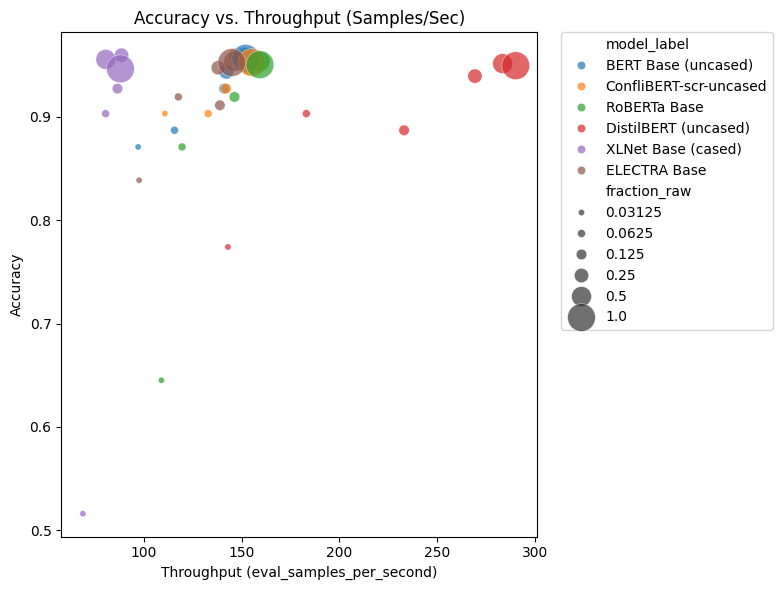

In [ ]:
scatter_plot_accuracy_vs_speed(df)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(results_df, value):
    """
    Creates a heatmap where:
      - Rows = Models (model_label)
      - Columns = Fractions (fraction_label)
      - Cell Values = eval_accuracy (color-coded)
    """

    # 1. Pivot the DataFrame: index=Model, columns=Fraction, values=Accuracy
    heatmap_data = results_df.pivot(
        index="model_label",
        columns="fraction_label",
        values= value
    )

    # 2. Sort columns in ascending order of fraction if you want
    heatmap_data = heatmap_data[["3%", "6%", "12%", "25%", "50%", "100%"]]

    # 3. Create the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        heatmap_data,
        annot=True,         # writes the accuracy values in each cell
        fmt=".3f",          # format for floating point
        cmap="YlGnBu",      # color palette
        cbar_kws={"label": "Accuracy"}  # colorbar label
    )

    # 4. Labeling and layout
    plt.title(f"{value} by Model and Data Fraction")
    plt.xlabel("Data Fraction")
    plt.ylabel("Model")
    plt.tight_layout()
    plt.show()


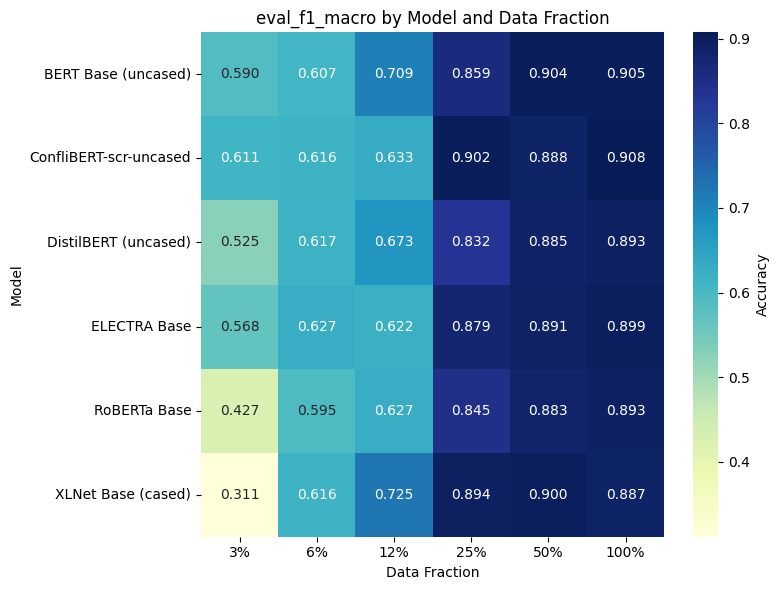

In [ ]:
plot_heatmap(df, "eval_f1_macro")

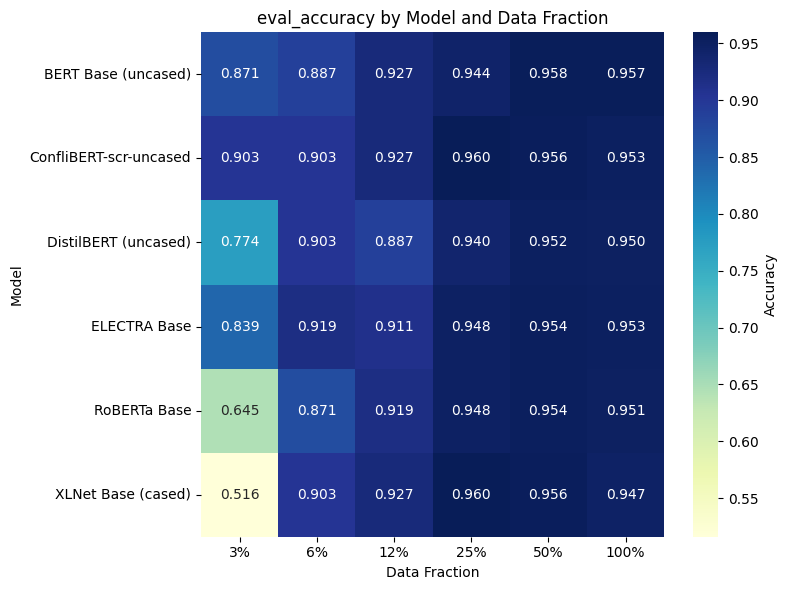

In [ ]:
plot_heatmap(df, "eval_accuracy") # Change plot_heatmap_accuracy to plot_heatmap

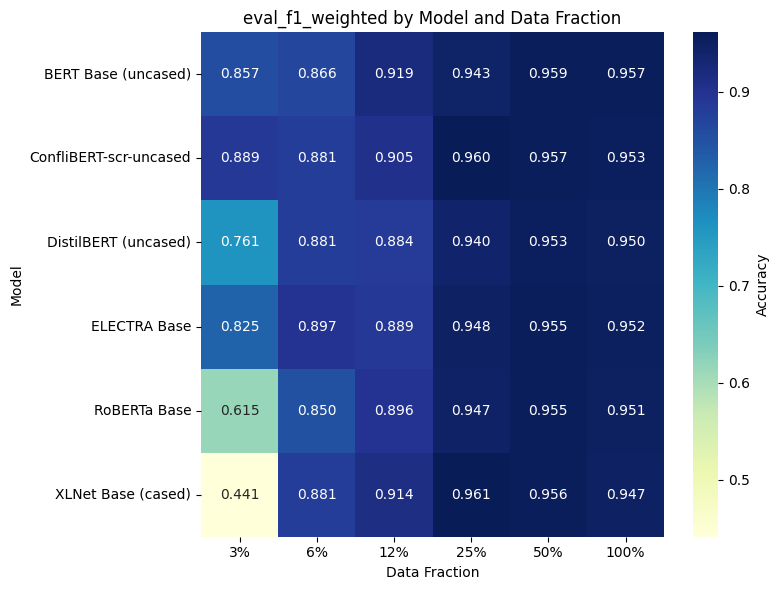

In [ ]:
plot_heatmap(df, "eval_f1_weighted") # Change plot_heatmap_accuracy to plot_heatmap